In [28]:
import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import LabelEncoder

In [29]:
train_data = pd.read_csv("/Users/akbarjonrasulov/Desktop/fraudTrain.csv")

In [30]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [31]:
train_data.describe()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [32]:
train_data.dtypes


Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [33]:
train_data.columns


Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [34]:
train_data["trans_date_trans_time"] = pd.to_datetime(train_data["trans_date_trans_time"])
train_data["dob"] = pd.to_datetime(train_data["dob"])
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [35]:
train_data.dropna(ignore_index=True)
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [36]:
train_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [37]:
train_data.dropna(ignore_index=True)


,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [38]:
encoder = LabelEncoder()
train_data["merchant"] = encoder.fit_transform(train_data["merchant"])
train_data["category"] = encoder.fit_transform(train_data["category"])
train_data["gender"] = encoder.fit_transform(train_data["gender"])
train_data["job"] = encoder.fit_transform(train_data["job"])

In [39]:
train_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,499,0,15.56,1,37.7175,-112.4777,258,215,1371816728,36.841266,-111.690765,0
1296671,2,1,51.70,1,39.2667,-77.5101,100,360,1371816739,38.906881,-78.246528,0
1296672,599,1,105.93,1,32.9396,-105.8189,899,308,1371816752,33.619513,-105.130529,0
1296673,509,1,74.90,1,43.3526,-102.5411,1126,485,1371816816,42.788940,-103.241160,0


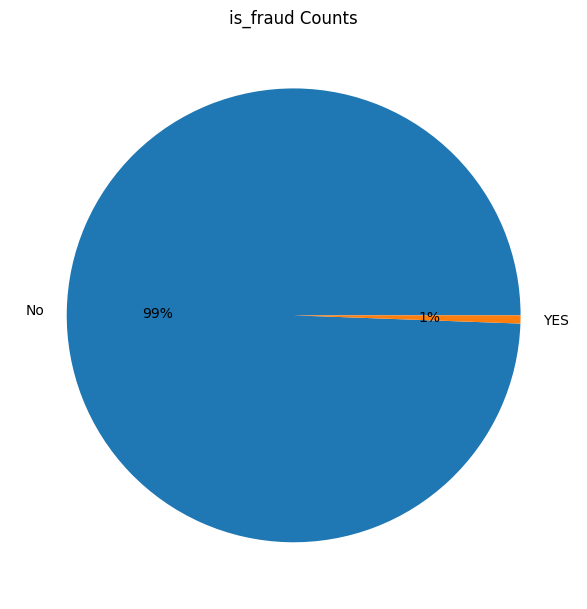

In [40]:
exit_counts = train_data["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [41]:
X = train_data.drop(columns=["is_fraud"], inplace = False)
Y = train_data["is_fraud"]

In [42]:
model = SVC()
model.fit(X, Y)

SVC()

In [43]:
model.score(X, Y)

0.9942113482561166

In [44]:
test_data = pd.read_csv("/Users/akbarjonrasulov/Desktop/fraudTest.csv")
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [45]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [46]:
encoder = LabelEncoder()
test_data["merchant"] = encoder.fit_transform(test_data["merchant"])
test_data["category"] = encoder.fit_transform(test_data["category"])
test_data["gender"] = encoder.fit_transform(test_data["gender"])
test_data["job"] = encoder.fit_transform(test_data["job"])

In [47]:
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,507,5,43.77,1,40.4931,-91.8912,519,460,1388534347,39.946837,-91.333331,0
555715,264,7,111.84,1,29.0393,-95.4401,28739,198,1388534349,29.661049,-96.186633,0
555716,496,7,86.88,0,46.1966,-118.9017,3684,294,1388534355,46.658340,-119.715054,0
555717,75,13,7.99,1,44.6255,-116.4493,129,58,1388534364,44.470525,-117.080888,0


In [48]:
X_test = test_data.drop(columns=["is_fraud"], inplace = False)
Y_test = test_data["is_fraud"]

In [49]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
accuracy = accuracy_score(test_data['is_fraud'],y_pred)
accuracy

0.9961401355721147

In [52]:
def get_user_input():
    # Asking the user faor input
    merchant = int(input("Enter the merchant code (integer): "))
    category = int(input("Enter the category code (integer): "))
    amt = float(input("Enter the transaction amount: "))
    gender = int(input("Enter the gender code (0 for female, 1 for male): "))
    lat = float(input("Enter the latitude: "))
    long = float(input("Enter the longitude: "))
    city_pop = int(input("Enter the city population: "))
    job = int(input("Enter the job code (integer): "))
    unix_time = int(input("Enter the Unix timestamp: "))
    merch_lat = float(input("Enter the merchant latitude: "))
    merch_long = float(input("Enter the merchant longitude: "))

    # Creating a new row based on the user's input
    new_data = {
        'merchant': merchant,
        'category': category,
        'amt': amt,
        'gender': gender,
        'lat': lat,
        'long': long,
        'city_pop': city_pop,
        'job': job,
        'unix_time': unix_time,
        'merch_lat': merch_lat,
        'merch_long': merch_long
    }
    
    return pd.DataFrame([new_data])

In [60]:
new_transaction = get_user_input()

In [61]:
new_prediction = model.predict(new_transaction)
print("The model predicts that the transaction is:", "Fraud" if new_prediction[0] == 1 else "Not Fraud")


The model predicts that the transaction is: Not Fraud


In [55]:
from sklearn.svm import SVC
import joblib

In [56]:
# Save the model to a file
joblib.dump(model, 'svm_model.pkl')
print("Model saved successfully!")


Model saved successfully!


In [57]:
loaded_model = joblib.load('svm_model.pkl')

# Now you can use it to make predictions
y_pred = loaded_model.predict(X_test)

In [58]:
accuracy = accuracy_score(test_data['is_fraud'],y_pred)
accuracy

0.9961401355721147

In [62]:
file_path = '/Users/akbarjonrasulov/Desktop/fraudTrain.csv'
data = pd.read_csv(file_path)

# Display first few rows to understand the structure of the data
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [63]:
# Convert 'trans_date_trans_time' to datetime and extract useful time-based features
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['hour'] = data['trans_date_trans_time'].dt.hour
data['day_of_week'] = data['trans_date_trans_time'].dt.day_name()

# Calculate age from 'dob' column
data['dob'] = pd.to_datetime(data['dob'])
data['age'] = (pd.to_datetime('today') - data['dob']).dt.days // 365

/var/folders/sv/s30k7vxd3c7csbmnvv6rrymw0000gn/T/ipykernel_93234/2460013269.py:105: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figs[i].show()


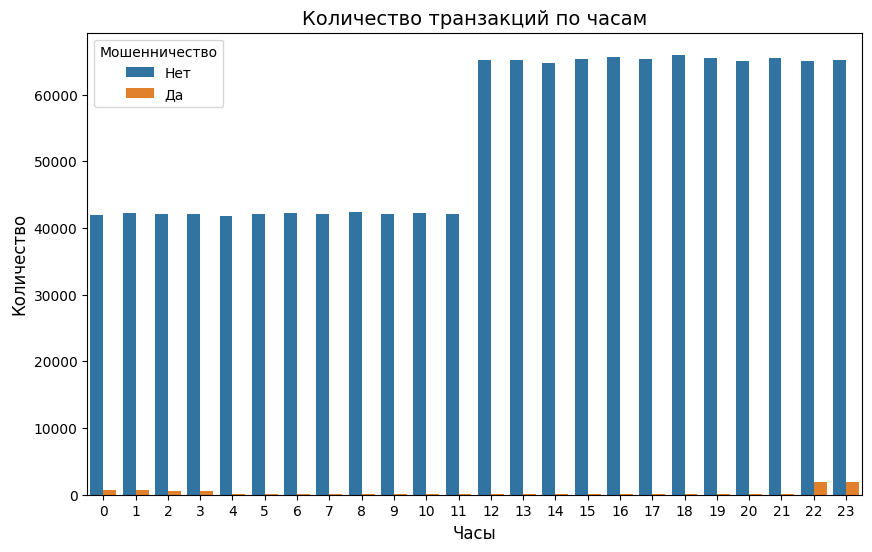

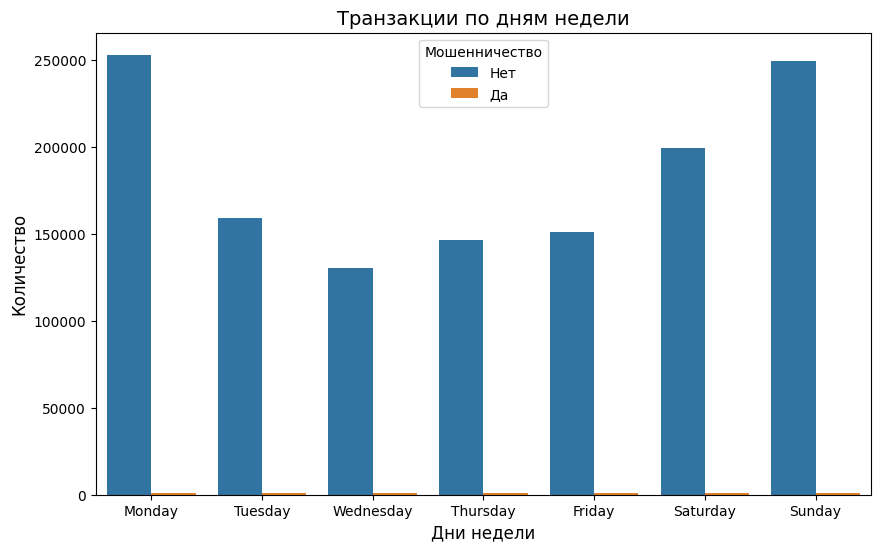

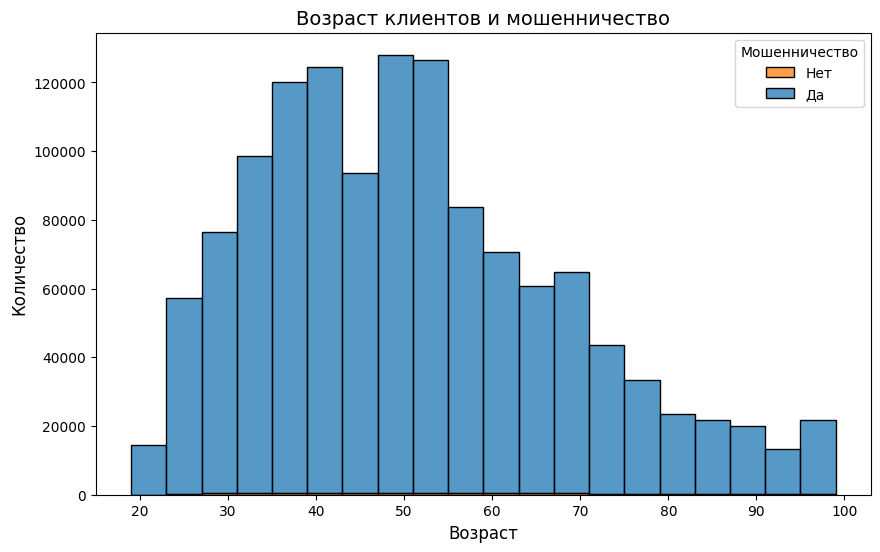

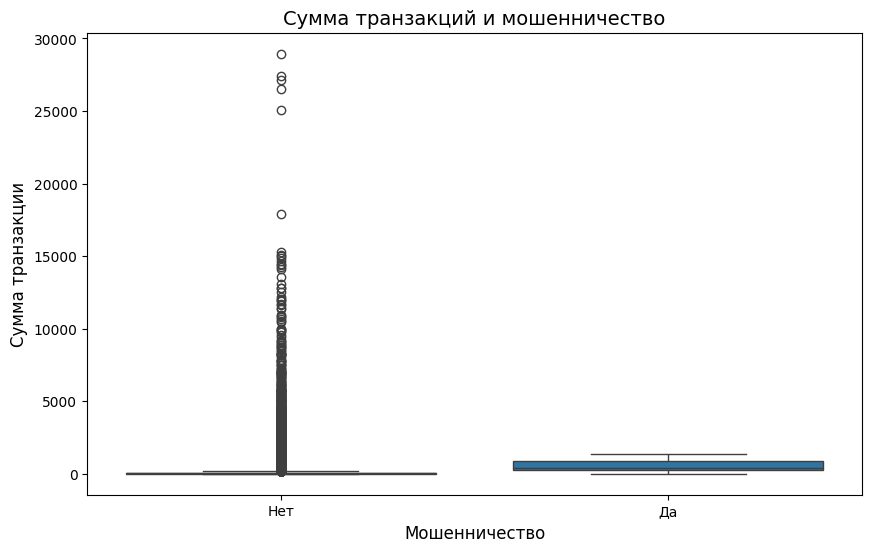

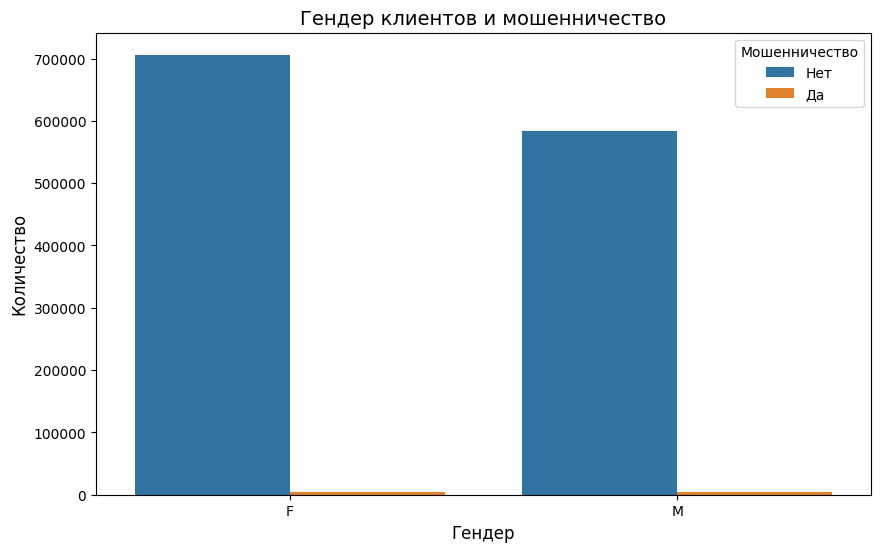

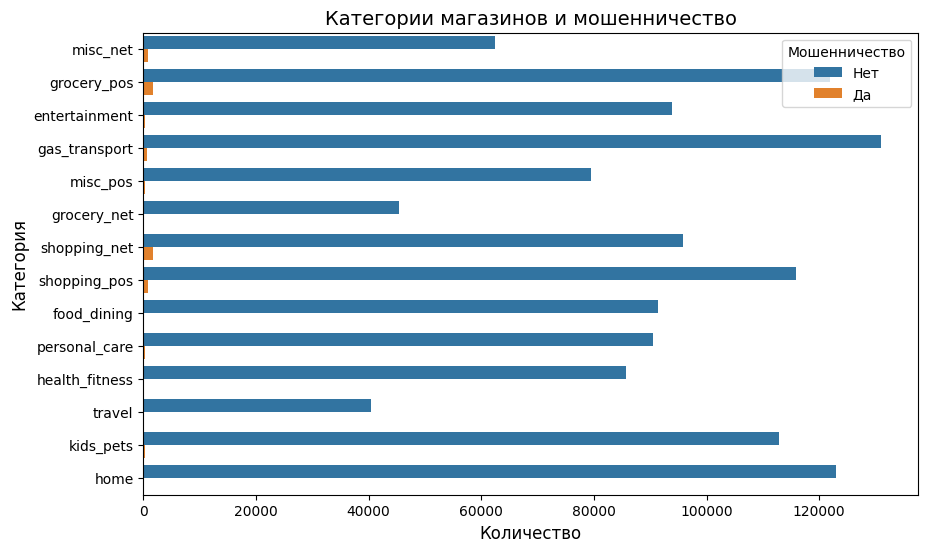

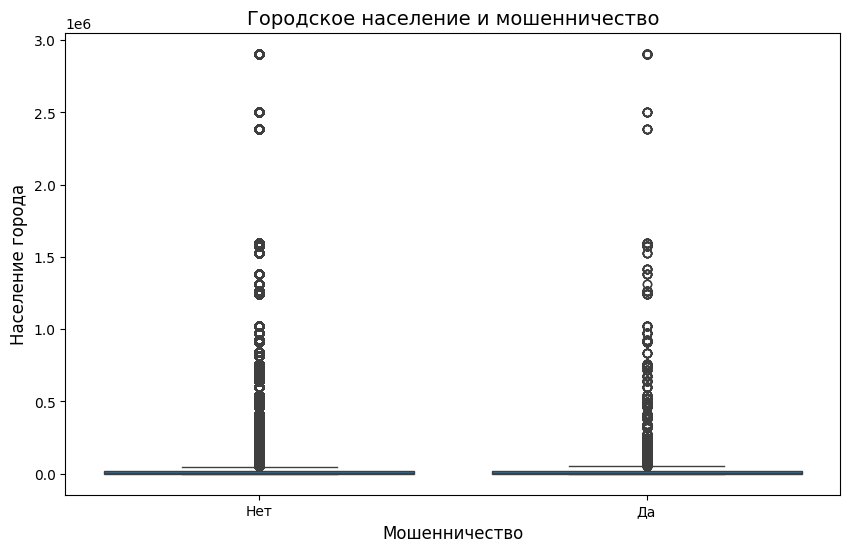

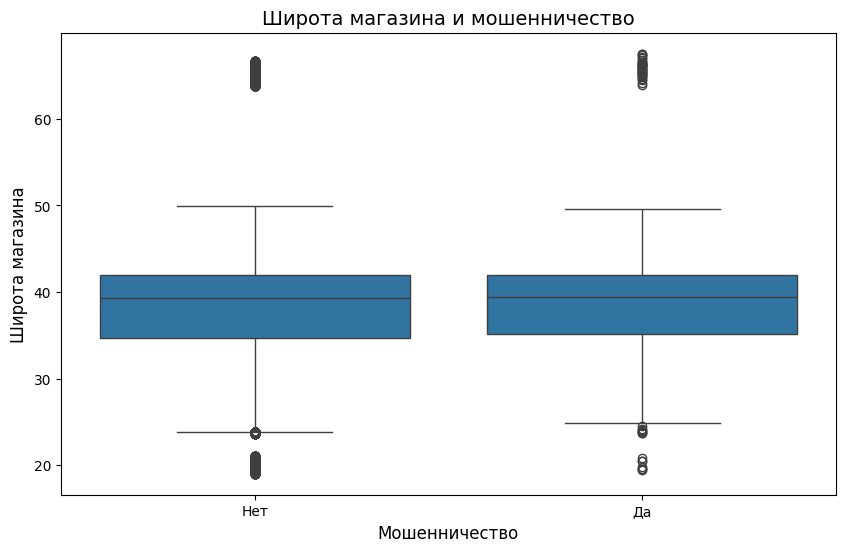

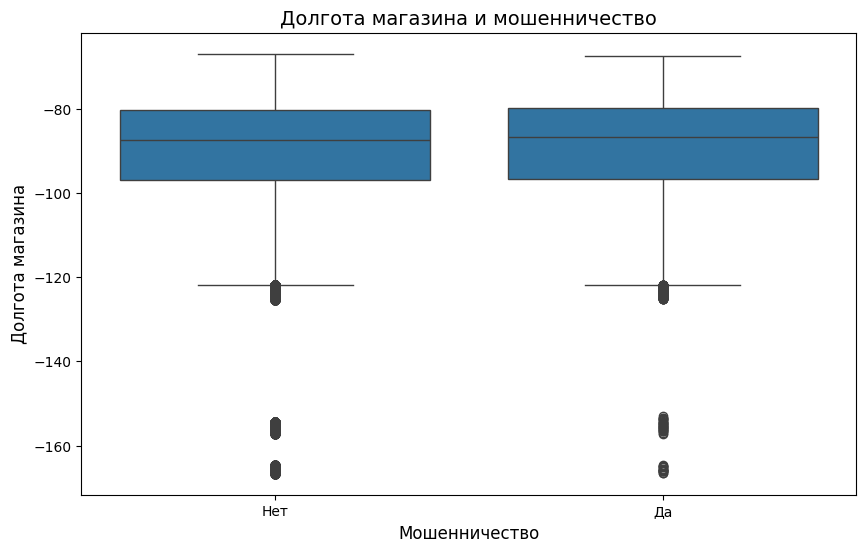

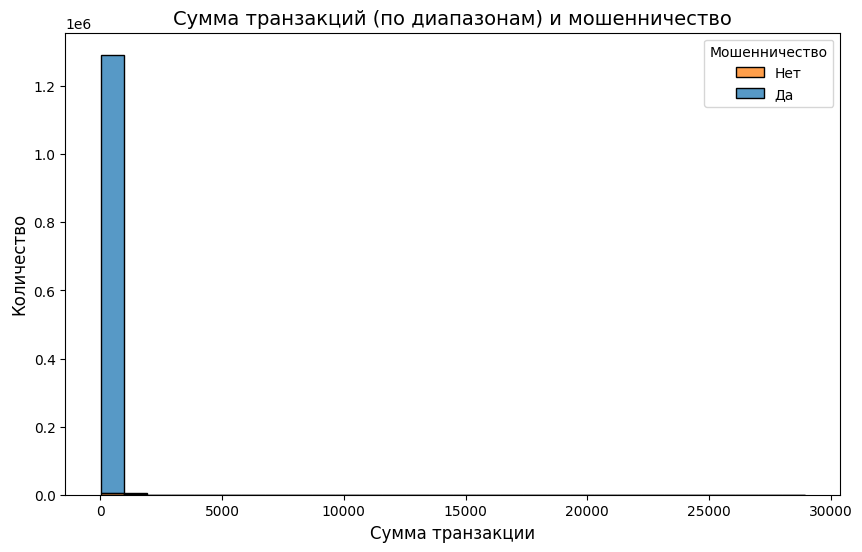

In [67]:
plt.rcdefaults()
import calendar

# Prepare more plots
def draw_separate_plots(data):
    fig_list = []
    
    # Plot 1: Fraud by Transaction Hour
    fig1 = plt.figure(figsize=(10,6))
    sns.countplot(x='hour', hue='is_fraud', data=data)
    plt.title('Количество транзакций по часам', fontsize=14)
    plt.xlabel('Часы', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig1)

    # Plot 2: Fraud by Day of the Week
    fig2 = plt.figure(figsize=(10,6))
    sns.countplot(x='day_of_week', hue='is_fraud', data=data, order=[calendar.day_name[i] for i in range(7)])
    plt.title('Транзакции по дням недели', fontsize=14)
    plt.xlabel('Дни недели', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig2)

    # Plot 3: Age Distribution by Fraud
    fig3 = plt.figure(figsize=(10,6))
    sns.histplot(x='age', hue='is_fraud', multiple='stack', data=data, bins=20)
    plt.title('Возраст клиентов и мошенничество', fontsize=14)
    plt.xlabel('Возраст', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig3)

    # Plot 4: Fraud by Transaction Amount
    fig4 = plt.figure(figsize=(10,6))
    sns.boxplot(x='is_fraud', y='amt', data=data)
    plt.title('Сумма транзакций и мошенничество', fontsize=14)
    plt.xlabel('Мошенничество', fontsize=12)
    plt.ylabel('Сумма транзакции', fontsize=12)
    plt.xticks([0, 1], ['Нет', 'Да'])
    fig_list.append(fig4)

    # Plot 5: Fraud by Gender
    fig5 = plt.figure(figsize=(10,6))
    sns.countplot(x='gender', hue='is_fraud', data=data)
    plt.title('Гендер клиентов и мошенничество', fontsize=14)
    plt.xlabel('Гендер', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig5)

    # Plot 6: Fraud by Merchant Category
    fig6 = plt.figure(figsize=(10,6))
    sns.countplot(y='category', hue='is_fraud', data=data)
    plt.title('Категории магазинов и мошенничество', fontsize=14)
    plt.xlabel('Количество', fontsize=12)
    plt.ylabel('Категория', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig6)

    # Plot 7: Fraud by City Population
    fig7 = plt.figure(figsize=(10,6))
    sns.boxplot(x='is_fraud', y='city_pop', data=data)
    plt.title('Городское население и мошенничество', fontsize=14)
    plt.xlabel('Мошенничество', fontsize=12)
    plt.ylabel('Население города', fontsize=12)
    plt.xticks([0, 1], ['Нет', 'Да'])
    fig_list.append(fig7)

    # Plot 8: Merchant Latitude vs Fraud
    fig8 = plt.figure(figsize=(10,6))
    sns.boxplot(x='is_fraud', y='merch_lat', data=data)
    plt.title('Широта магазина и мошенничество', fontsize=14)
    plt.xlabel('Мошенничество', fontsize=12)
    plt.ylabel('Широта магазина', fontsize=12)
    plt.xticks([0, 1], ['Нет', 'Да'])
    fig_list.append(fig8)

    # Plot 9: Merchant Longitude vs Fraud
    fig9 = plt.figure(figsize=(10,6))
    sns.boxplot(x='is_fraud', y='merch_long', data=data)
    plt.title('Долгота магазина и мошенничество', fontsize=14)
    plt.xlabel('Мошенничество', fontsize=12)
    plt.ylabel('Долгота магазина', fontsize=12)
    plt.xticks([0, 1], ['Нет', 'Да'])
    fig_list.append(fig9)

    # Plot 10: Fraud by Transaction Amount Range (binned)
    fig10 = plt.figure(figsize=(10,6))
    sns.histplot(x='amt', hue='is_fraud', multiple='stack', data=data, bins=30)
    plt.title('Сумма транзакций (по диапазонам) и мошенничество', fontsize=14)
    plt.xlabel('Сумма транзакции', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig10)

    return fig_list

# Drawing separate plots
figs = draw_separate_plots(data)

# Show the first few figures (20-30 plots are prepared separately)
for i in range(10):  # Display 10 plots initially
    figs[i].show()

/var/folders/sv/s30k7vxd3c7csbmnvv6rrymw0000gn/T/ipykernel_93234/941227968.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  additional_figs[i].show()


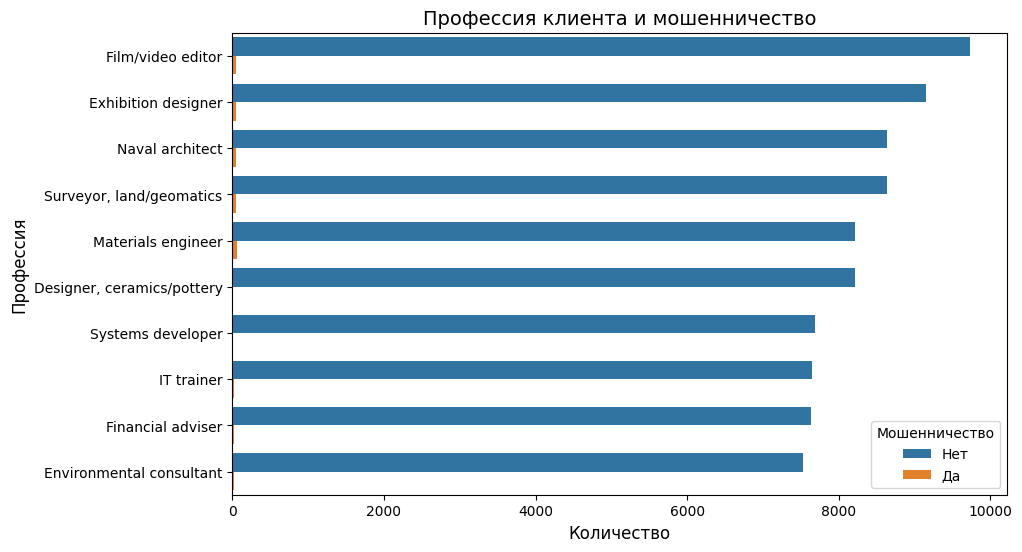

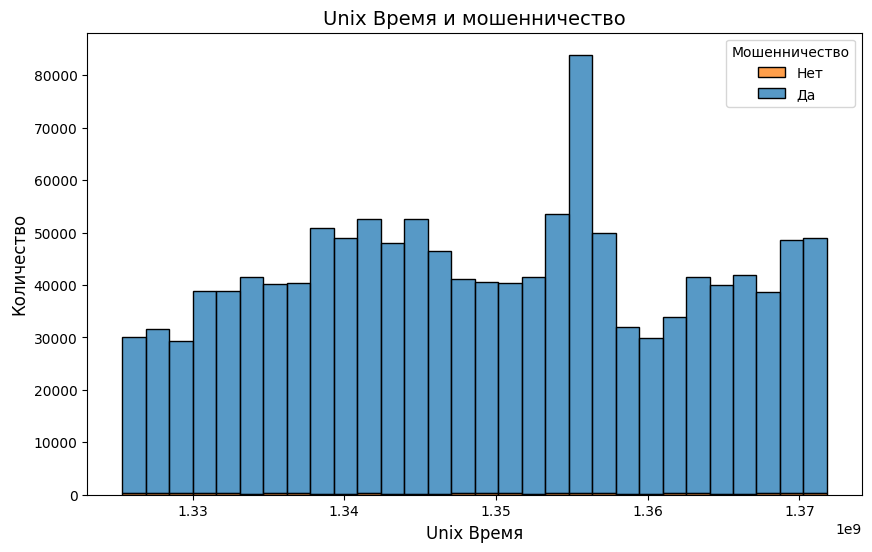

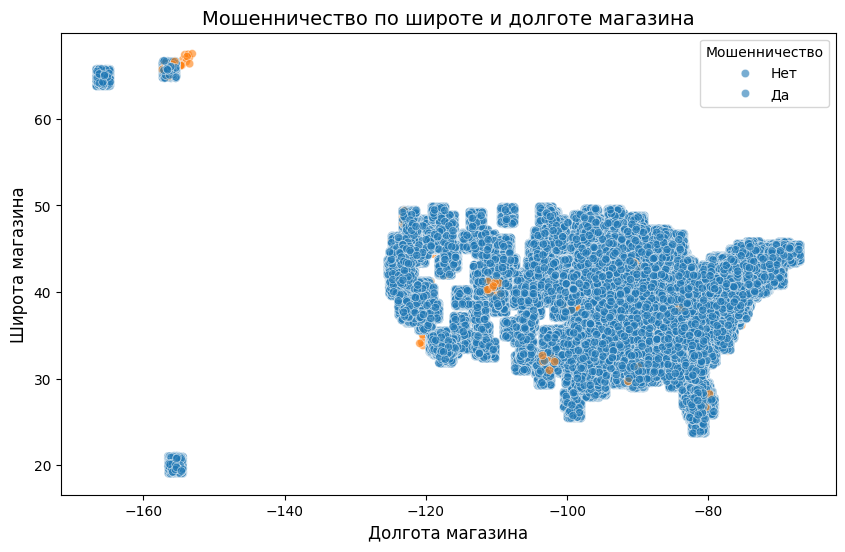

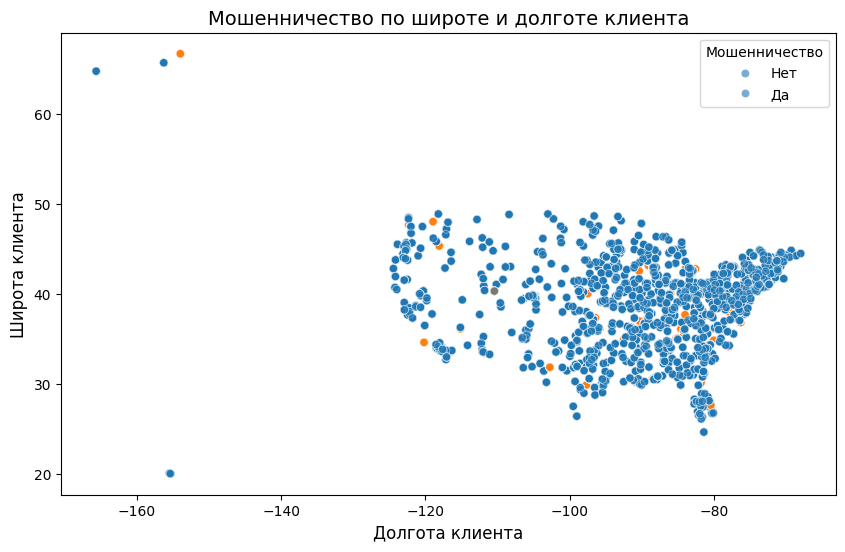

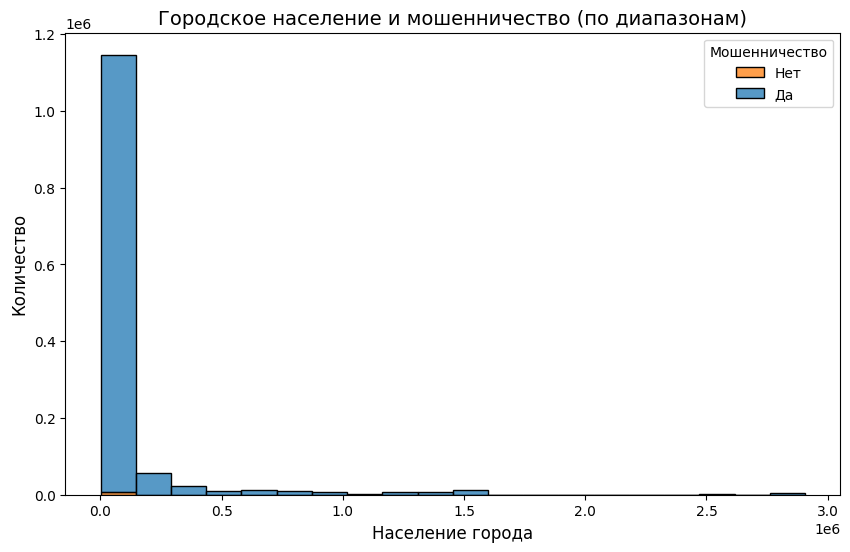

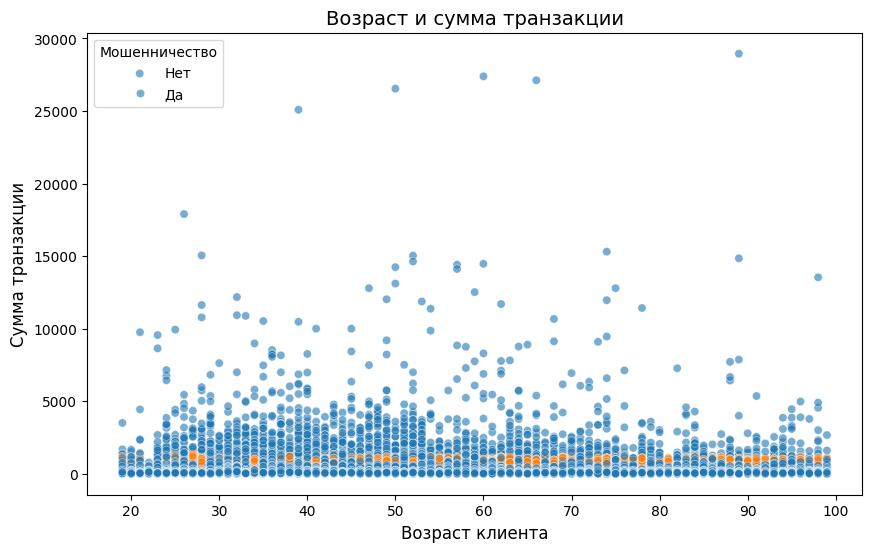

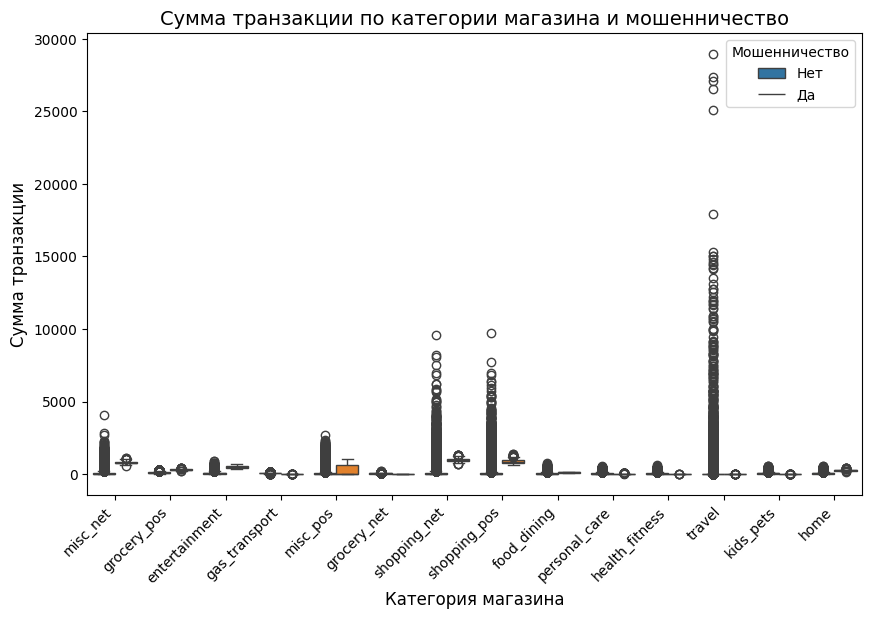

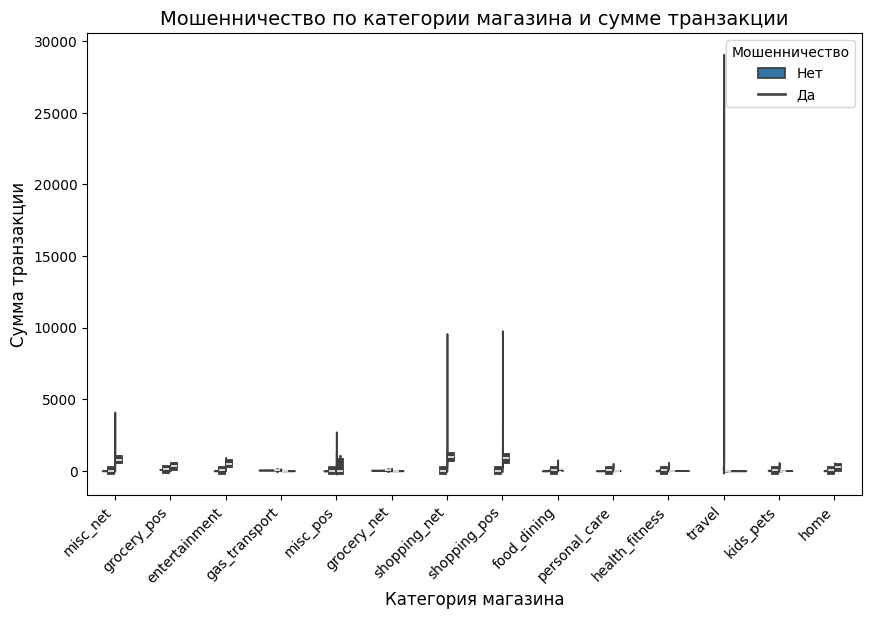

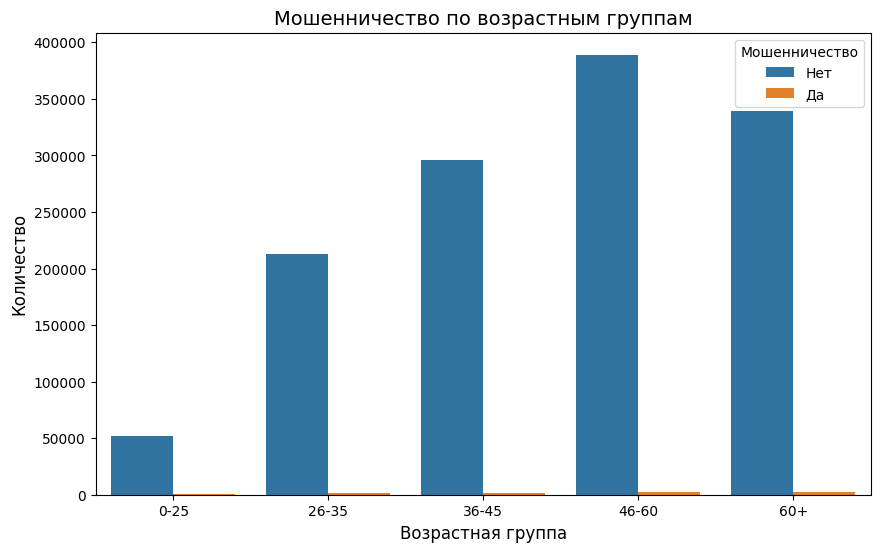

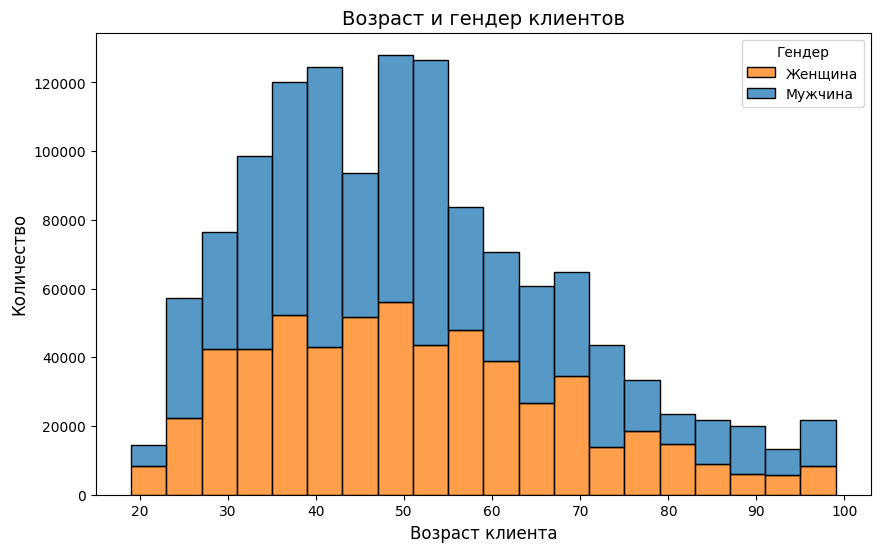

In [68]:
def draw_additional_plots(data):
    fig_list = []
    
    # Plot 11: Fraud by Job Category
    fig11 = plt.figure(figsize=(10,6))
    sns.countplot(y='job', hue='is_fraud', data=data, order=data['job'].value_counts().index[:10])
    plt.title('Профессия клиента и мошенничество', fontsize=14)
    plt.xlabel('Количество', fontsize=12)
    plt.ylabel('Профессия', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig11)

    # Plot 12: Fraud by Unix Time (Transaction Time)
    fig12 = plt.figure(figsize=(10,6))
    sns.histplot(x='unix_time', hue='is_fraud', multiple='stack', data=data, bins=30)
    plt.title('Unix Время и мошенничество', fontsize=14)
    plt.xlabel('Unix Время', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig12)

    # Plot 13: Fraud by Merchant Latitude vs Longitude (Scatter Plot)
    fig13 = plt.figure(figsize=(10,6))
    sns.scatterplot(x='merch_long', y='merch_lat', hue='is_fraud', data=data, alpha=0.6)
    plt.title('Мошенничество по широте и долготе магазина', fontsize=14)
    plt.xlabel('Долгота магазина', fontsize=12)
    plt.ylabel('Широта магазина', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig13)

    # Plot 14: Fraud by Customer Latitude vs Longitude (Scatter Plot)
    fig14 = plt.figure(figsize=(10,6))
    sns.scatterplot(x='long', y='lat', hue='is_fraud', data=data, alpha=0.6)
    plt.title('Мошенничество по широте и долготе клиента', fontsize=14)
    plt.xlabel('Долгота клиента', fontsize=12)
    plt.ylabel('Широта клиента', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig14)

    # Plot 15: Fraud by City Population Range (Binned)
    fig15 = plt.figure(figsize=(10,6))
    sns.histplot(x='city_pop', hue='is_fraud', multiple='stack', data=data, bins=20)
    plt.title('Городское население и мошенничество (по диапазонам)', fontsize=14)
    plt.xlabel('Население города', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig15)

    # Plot 16: Age vs Transaction Amount (Scatter Plot)
    fig16 = plt.figure(figsize=(10,6))
    sns.scatterplot(x='age', y='amt', hue='is_fraud', data=data, alpha=0.6)
    plt.title('Возраст и сумма транзакции', fontsize=14)
    plt.xlabel('Возраст клиента', fontsize=12)
    plt.ylabel('Сумма транзакции', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig16)

    # Plot 17: Transaction Amount by Merchant Category (Boxplot)
    fig17 = plt.figure(figsize=(10,6))
    sns.boxplot(x='category', y='amt', hue='is_fraud', data=data)
    plt.title('Сумма транзакции по категории магазина и мошенничество', fontsize=14)
    plt.xlabel('Категория магазина', fontsize=12)
    plt.ylabel('Сумма транзакции', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig17)

    # Plot 18: Fraud by Merchant Category and Transaction Amount (Violin Plot)
    fig18 = plt.figure(figsize=(10,6))
    sns.violinplot(x='category', y='amt', hue='is_fraud', data=data, split=True)
    plt.title('Мошенничество по категории магазина и сумме транзакции', fontsize=14)
    plt.xlabel('Категория магазина', fontsize=12)
    plt.ylabel('Сумма транзакции', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig18)

    # Plot 19: Fraud by Age Group (Binned)
    fig19 = plt.figure(figsize=(10,6))
    data['age_group'] = pd.cut(data['age'], bins=[0, 25, 35, 45, 60, 100], labels=['0-25', '26-35', '36-45', '46-60', '60+'])
    sns.countplot(x='age_group', hue='is_fraud', data=data)
    plt.title('Мошенничество по возрастным группам', fontsize=14)
    plt.xlabel('Возрастная группа', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig19)

    # Plot 20: Fraud by Age and Gender (Stacked Bar)
    fig20 = plt.figure(figsize=(10,6))
    sns.histplot(x='age', hue='gender', multiple='stack', data=data, bins=20)
    plt.title('Возраст и гендер клиентов', fontsize=14)
    plt.xlabel('Возраст клиента', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.legend(title='Гендер', labels=['Женщина', 'Мужчина'], fontsize=10)
    fig_list.append(fig20)

    return fig_list

# Drawing additional plots
additional_figs = draw_additional_plots(data)

# Show the additional plots
for i in range(10):  # Display another set of 10 plots
    additional_figs[i].show()

/var/folders/sv/s30k7vxd3c7csbmnvv6rrymw0000gn/T/ipykernel_93234/3174040181.py:104: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  final_figs[i].show()


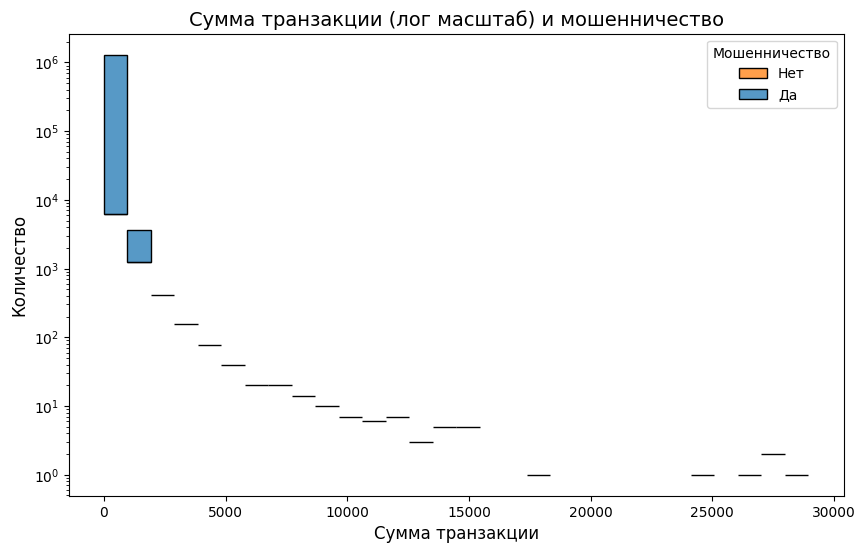

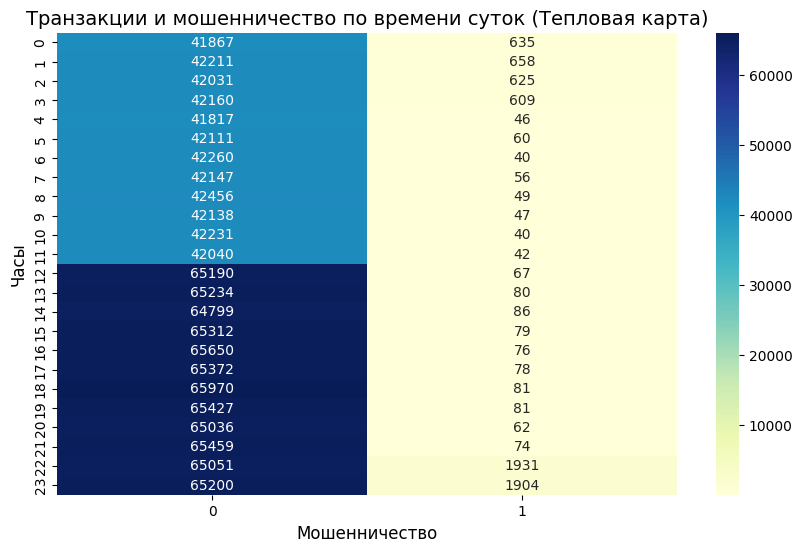

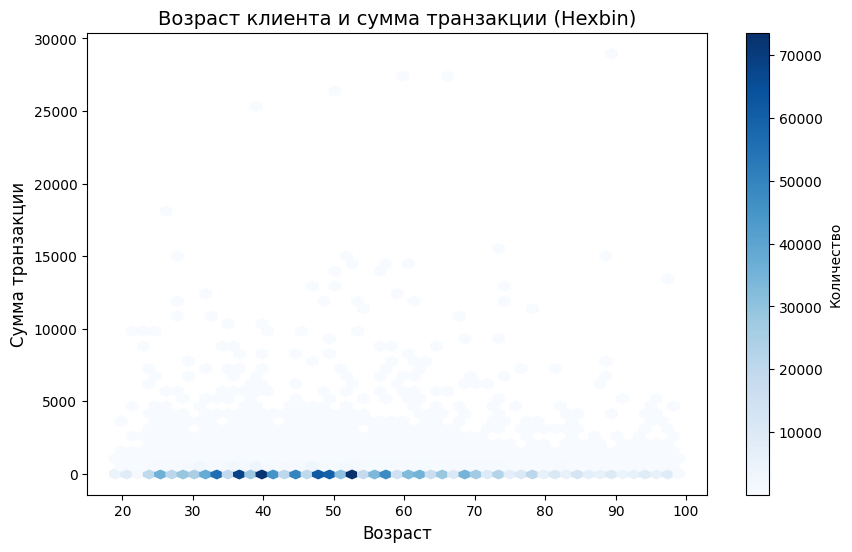

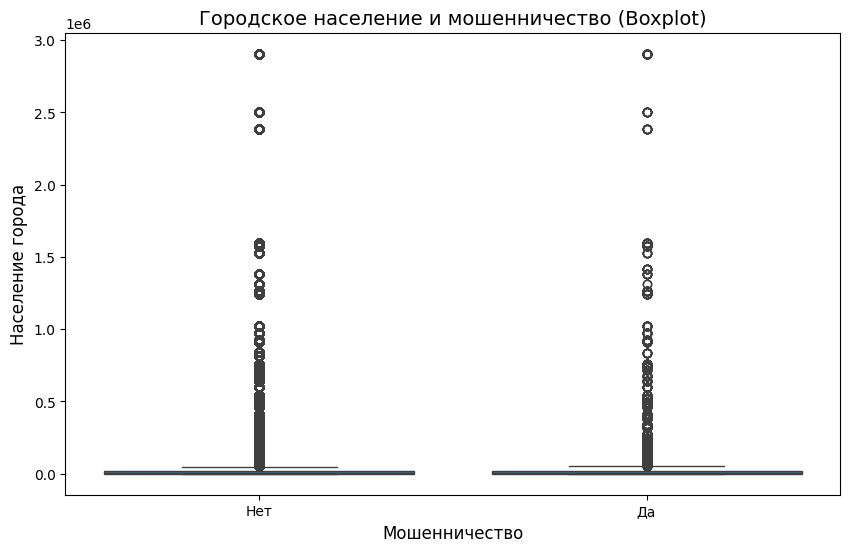

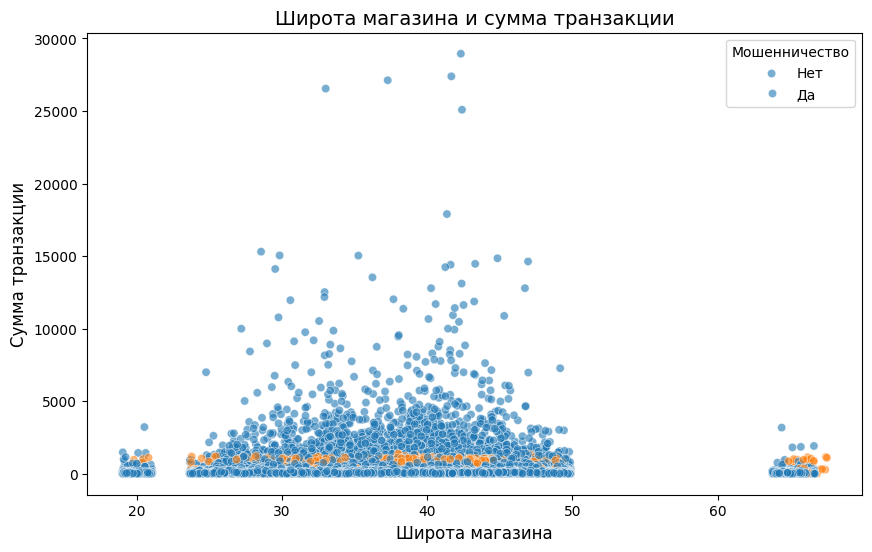

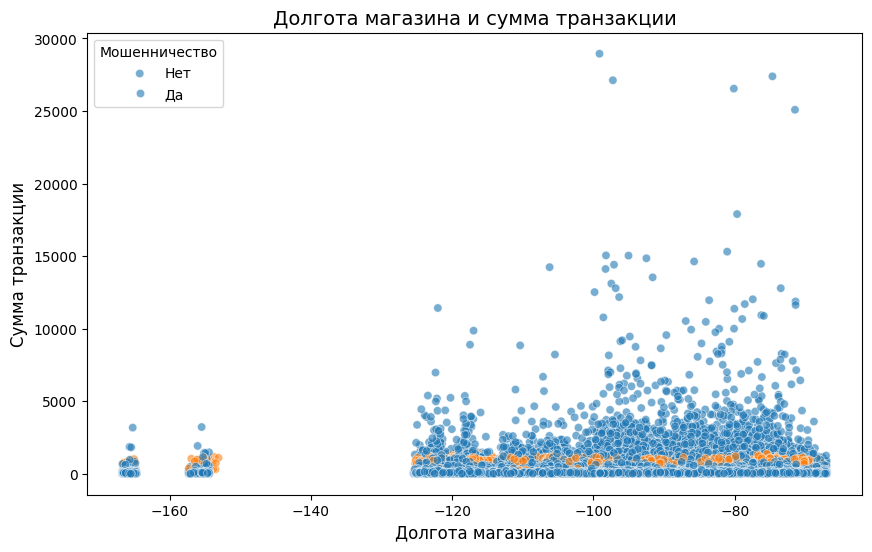

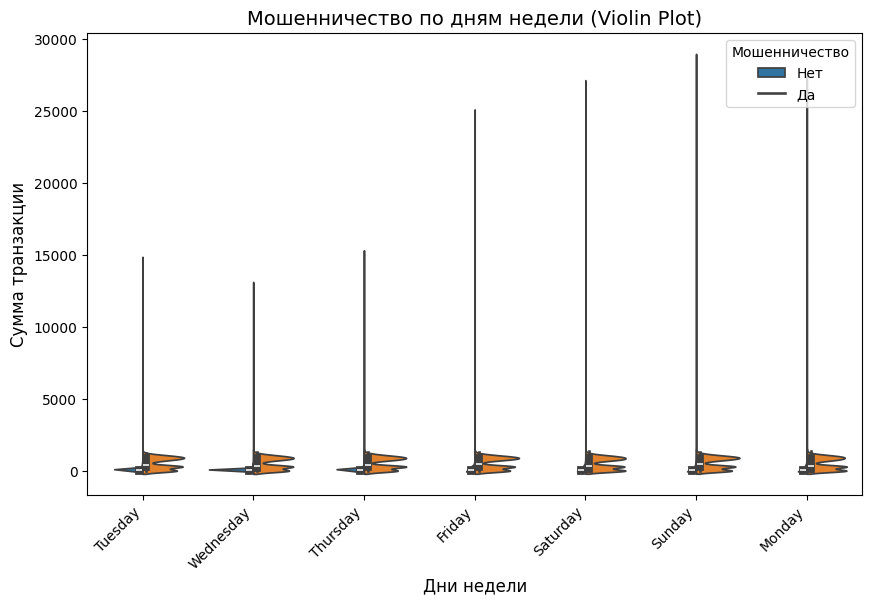

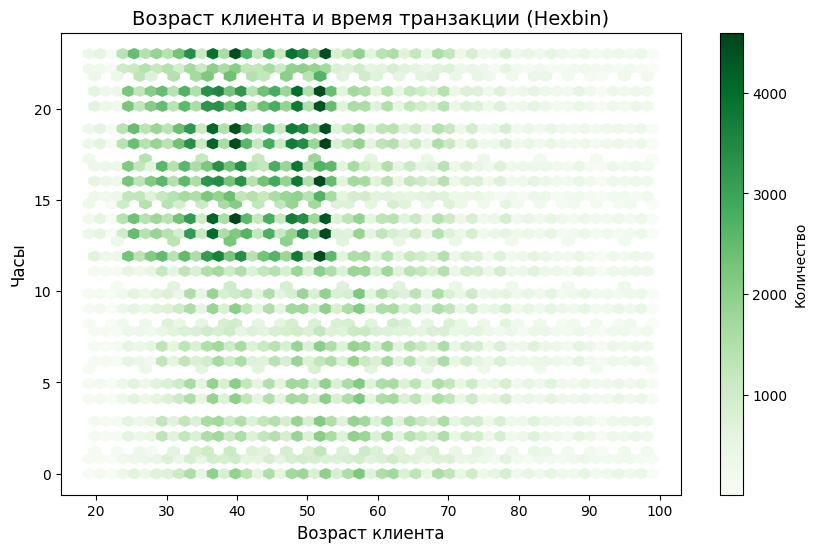

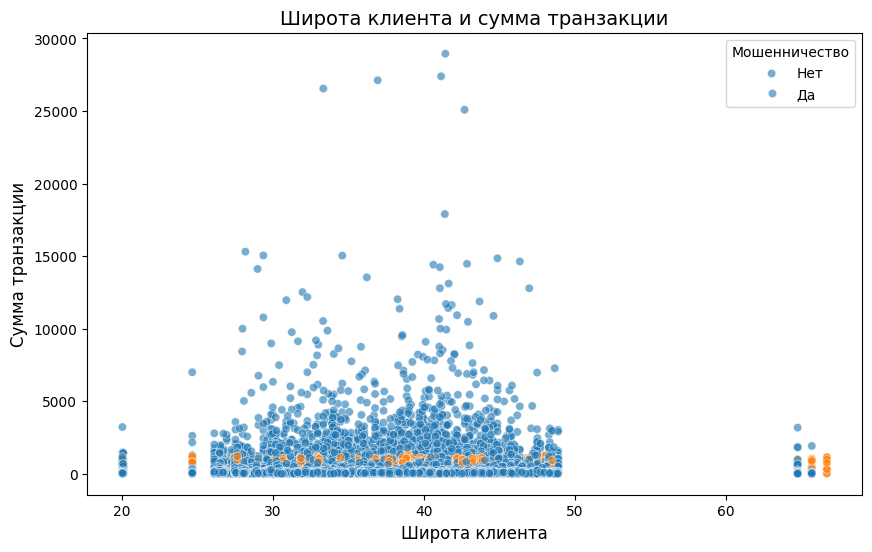

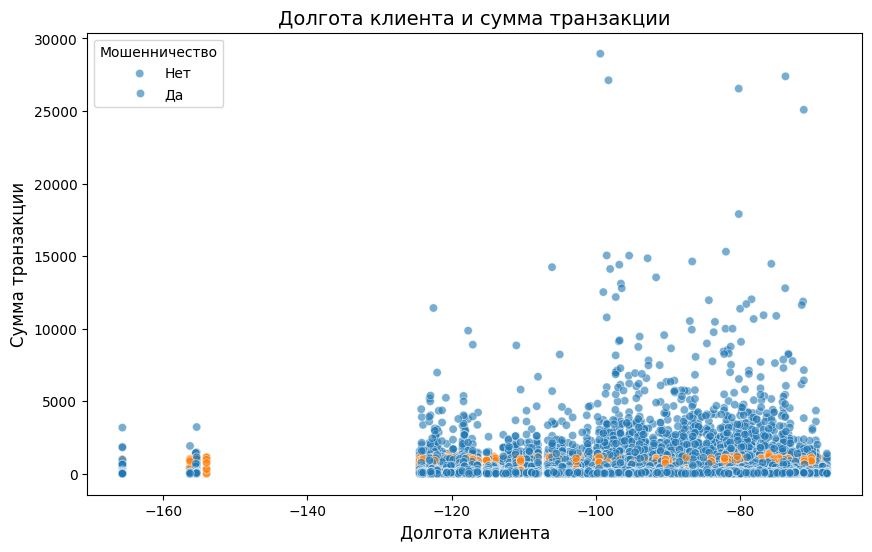

In [69]:
# Generating 10 more plots as requested
def draw_final_plots(data):
    fig_list = []
    
    # Plot 21: Fraud by Transaction Amount (Log Scale)
    fig21 = plt.figure(figsize=(10,6))
    sns.histplot(x='amt', hue='is_fraud', multiple='stack', data=data, log_scale=(False, True), bins=30)
    plt.title('Сумма транзакции (лог масштаб) и мошенничество', fontsize=14)
    plt.xlabel('Сумма транзакции', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig21)

    # Plot 22: Fraud by Transaction Time of Day (Heatmap)
    fig22 = plt.figure(figsize=(10,6))
    data['day_hour'] = data['trans_date_trans_time'].dt.hour
    hour_fraud_table = pd.crosstab(data['day_hour'], data['is_fraud'])
    sns.heatmap(hour_fraud_table, cmap="YlGnBu", annot=True, fmt="d")
    plt.title('Транзакции и мошенничество по времени суток (Тепловая карта)', fontsize=14)
    plt.xlabel('Мошенничество', fontsize=12)
    plt.ylabel('Часы', fontsize=12)
    fig_list.append(fig22)

    # Plot 23: Fraud by Customer Age and Transaction Amount (Hexbin Plot)
    fig23 = plt.figure(figsize=(10,6))
    plt.hexbin(data['age'], data['amt'], gridsize=50, cmap='Blues', mincnt=1)
    plt.title('Возраст клиента и сумма транзакции (Hexbin)', fontsize=14)
    plt.xlabel('Возраст', fontsize=12)
    plt.ylabel('Сумма транзакции', fontsize=12)
    plt.colorbar(label='Количество')
    fig_list.append(fig23)

    # Plot 24: Transaction Amount by City Population (Boxplot)
    fig24 = plt.figure(figsize=(10,6))
    sns.boxplot(x='is_fraud', y='city_pop', data=data)
    plt.title('Городское население и мошенничество (Boxplot)', fontsize=14)
    plt.xlabel('Мошенничество', fontsize=12)
    plt.ylabel('Население города', fontsize=12)
    plt.xticks([0, 1], ['Нет', 'Да'])
    fig_list.append(fig24)

    # Plot 25: Merchant Latitude vs Transaction Amount (Scatter Plot)
    fig25 = plt.figure(figsize=(10,6))
    sns.scatterplot(x='merch_lat', y='amt', hue='is_fraud', data=data, alpha=0.6)
    plt.title('Широта магазина и сумма транзакции', fontsize=14)
    plt.xlabel('Широта магазина', fontsize=12)
    plt.ylabel('Сумма транзакции', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig25)

    # Plot 26: Merchant Longitude vs Transaction Amount (Scatter Plot)
    fig26 = plt.figure(figsize=(10,6))
    sns.scatterplot(x='merch_long', y='amt', hue='is_fraud', data=data, alpha=0.6)
    plt.title('Долгота магазина и сумма транзакции', fontsize=14)
    plt.xlabel('Долгота магазина', fontsize=12)
    plt.ylabel('Сумма транзакции', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig26)

    # Plot 27: Fraud by Day of the Week (Violin Plot)
    fig27 = plt.figure(figsize=(10,6))
    sns.violinplot(x='day_of_week', y='amt', hue='is_fraud', data=data, split=True)
    plt.title('Мошенничество по дням недели (Violin Plot)', fontsize=14)
    plt.xlabel('Дни недели', fontsize=12)
    plt.ylabel('Сумма транзакции', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig27)

    # Plot 28: Fraud by Age and Transaction Time (Hexbin)
    fig28 = plt.figure(figsize=(10,6))
    plt.hexbin(data['age'], data['day_hour'], gridsize=50, cmap='Greens', mincnt=1)
    plt.title('Возраст клиента и время транзакции (Hexbin)', fontsize=14)
    plt.xlabel('Возраст клиента', fontsize=12)
    plt.ylabel('Часы', fontsize=12)
    plt.colorbar(label='Количество')
    fig_list.append(fig28)

    # Plot 29: Customer Latitude vs Transaction Amount (Scatter Plot)
    fig29 = plt.figure(figsize=(10,6))
    sns.scatterplot(x='lat', y='amt', hue='is_fraud', data=data, alpha=0.6)
    plt.title('Широта клиента и сумма транзакции', fontsize=14)
    plt.xlabel('Широта клиента', fontsize=12)
    plt.ylabel('Сумма транзакции', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig29)

    # Plot 30: Customer Longitude vs Transaction Amount (Scatter Plot)
    fig30 = plt.figure(figsize=(10,6))
    sns.scatterplot(x='long', y='amt', hue='is_fraud', data=data, alpha=0.6)
    plt.title('Долгота клиента и сумма транзакции', fontsize=14)
    plt.xlabel('Долгота клиента', fontsize=12)
    plt.ylabel('Сумма транзакции', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig30)

    return fig_list

# Drawing final 10 plots
final_figs = draw_final_plots(data)

# Show the last 10 plots
for i in range(10):  # Display the final set of 10 plots
    final_figs[i].show()


/var/folders/sv/s30k7vxd3c7csbmnvv6rrymw0000gn/T/ipykernel_93234/944553323.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_of_week', y='amt', hue='is_fraud', data=data, ci=None)
/var/folders/sv/s30k7vxd3c7csbmnvv6rrymw0000gn/T/ipykernel_93234/944553323.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='job', x='amt', hue='is_fraud', data=data, ci=None, estimator=sum)
/var/folders/sv/s30k7vxd3c7csbmnvv6rrymw0000gn/T/ipykernel_93234/944553323.py:86: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day_hour', y='amt', hue='category', data=data, ci=None, estimator=sum)
/var/folders/sv/s30k7vxd3c7csbmnvv6rrymw0000gn/T/ipykernel_93234/944553323.py:100: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  final_final_figs[i].show()


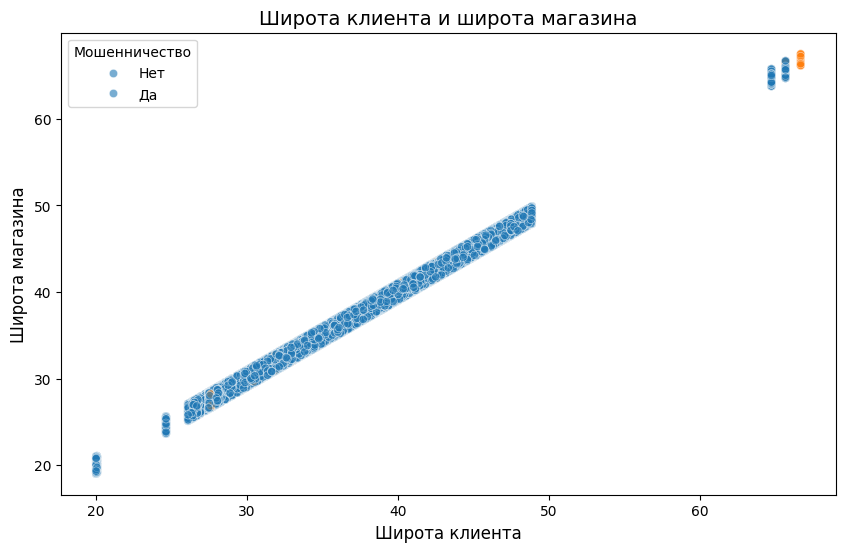

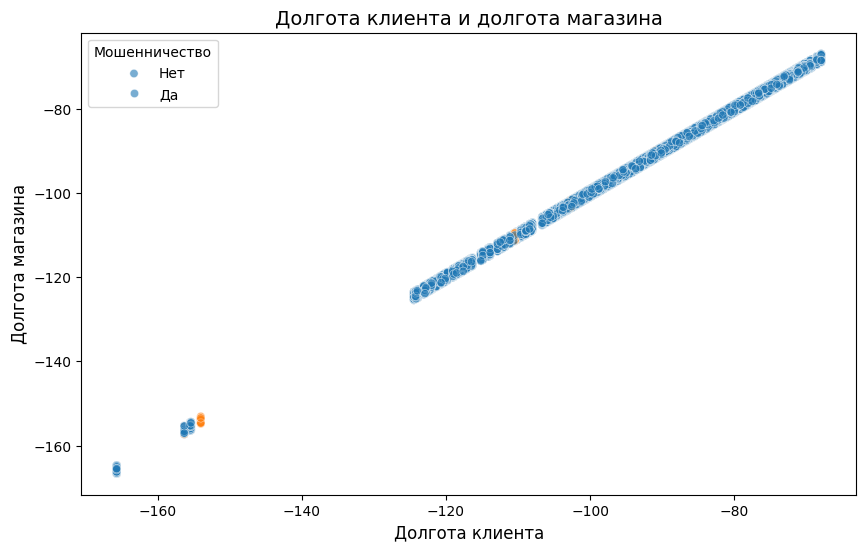

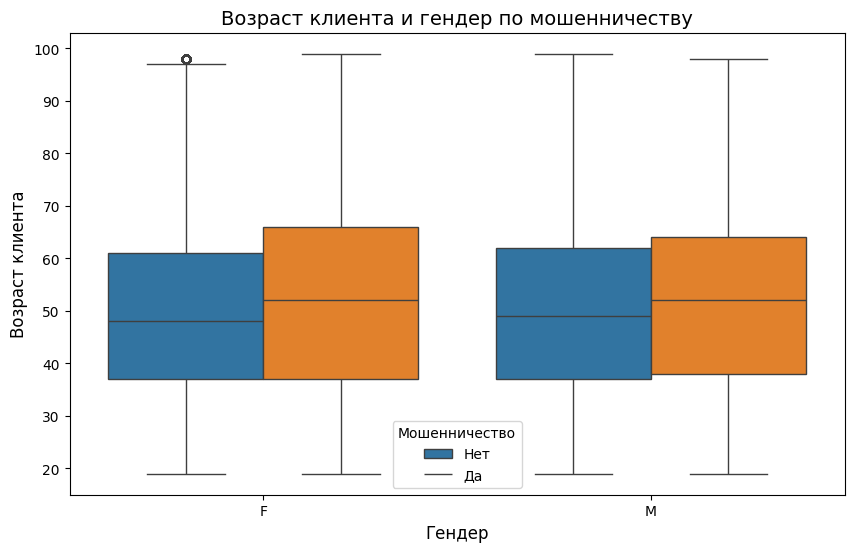

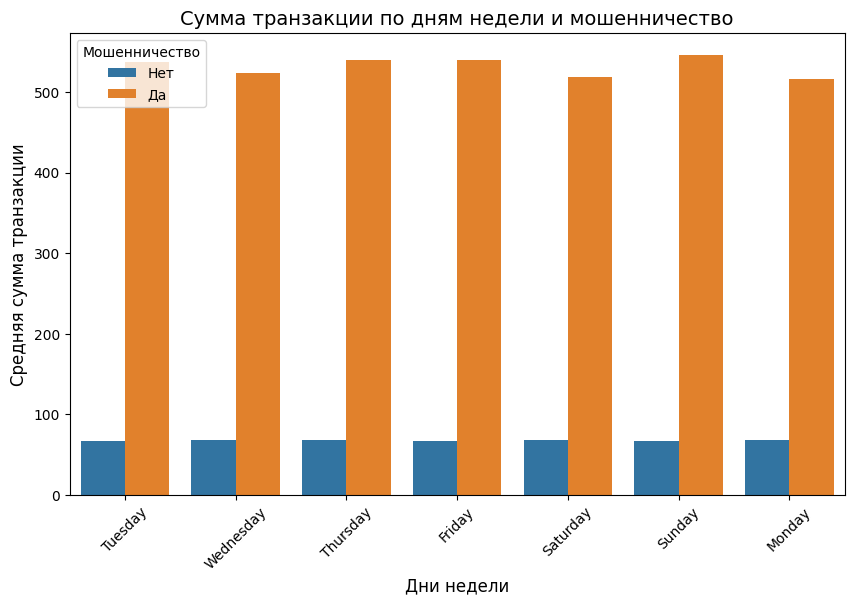

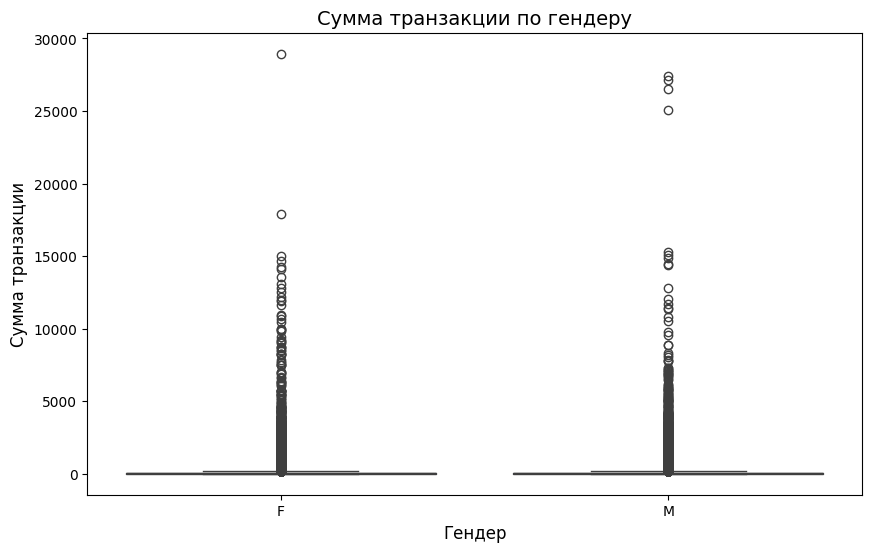

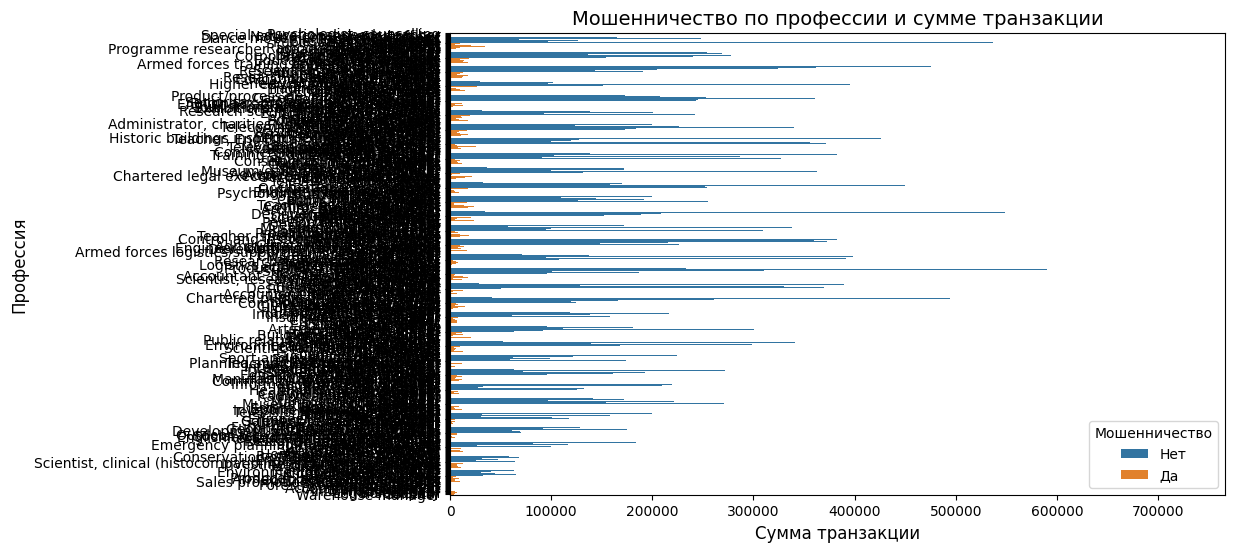

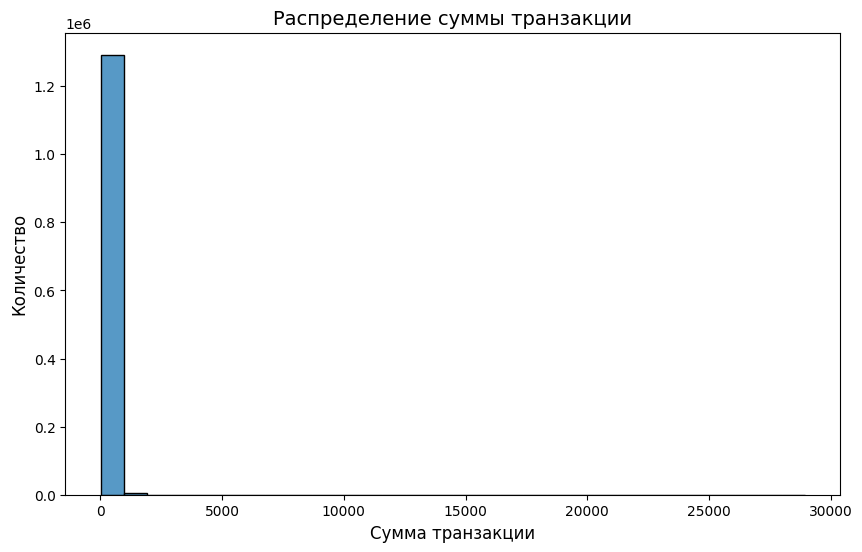

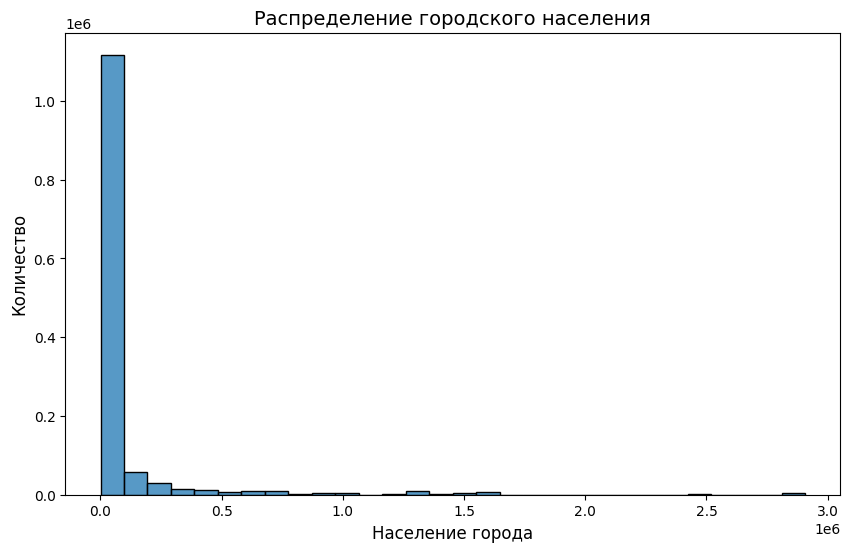

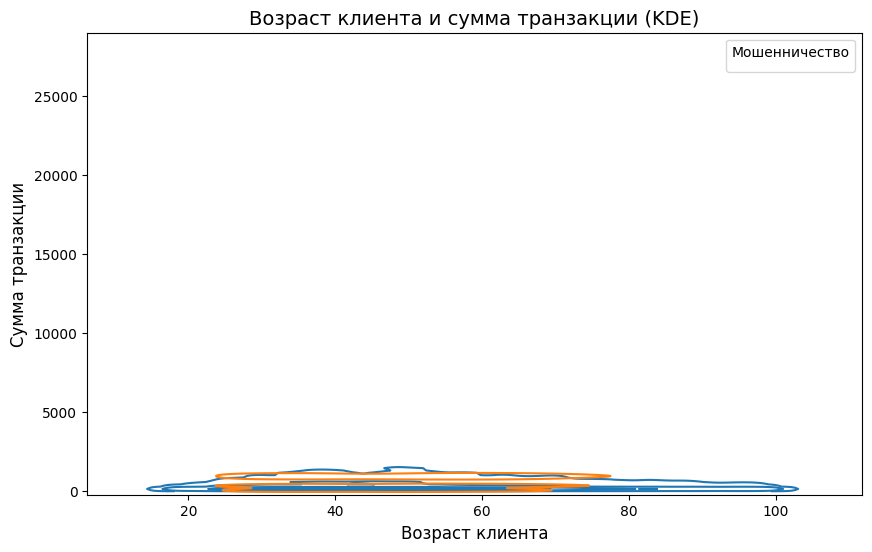

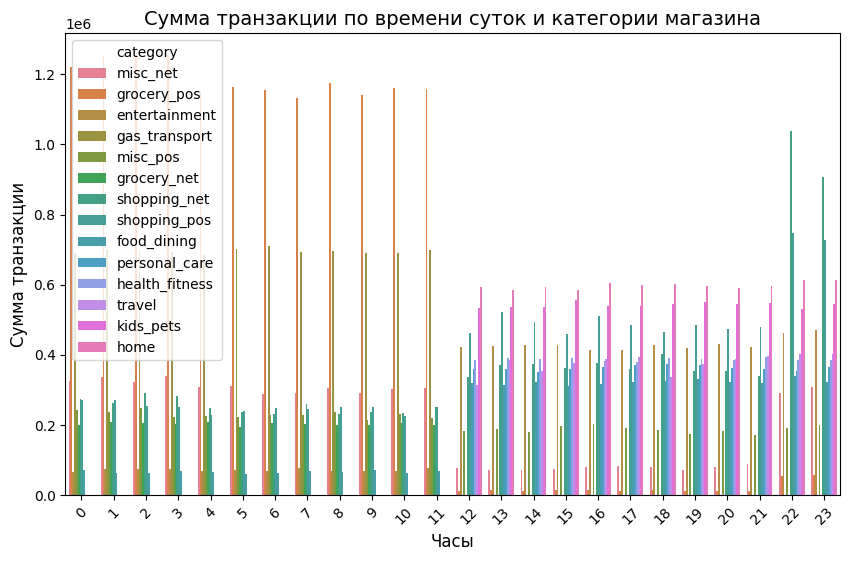

In [70]:
# Generating 10 more plots to complete the request
def draw_additional_final_plots(data):
    fig_list = []
    
    # Plot 31: Customer Latitude vs Merchant Latitude (Scatter Plot)
    fig31 = plt.figure(figsize=(10,6))
    sns.scatterplot(x='lat', y='merch_lat', hue='is_fraud', data=data, alpha=0.6)
    plt.title('Широта клиента и широта магазина', fontsize=14)
    plt.xlabel('Широта клиента', fontsize=12)
    plt.ylabel('Широта магазина', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig31)

    # Plot 32: Customer Longitude vs Merchant Longitude (Scatter Plot)
    fig32 = plt.figure(figsize=(10,6))
    sns.scatterplot(x='long', y='merch_long', hue='is_fraud', data=data, alpha=0.6)
    plt.title('Долгота клиента и долгота магазина', fontsize=14)
    plt.xlabel('Долгота клиента', fontsize=12)
    plt.ylabel('Долгота магазина', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig32)

    # Plot 33: Fraud by Age and Gender (Boxplot)
    fig33 = plt.figure(figsize=(10,6))
    sns.boxplot(x='gender', y='age', hue='is_fraud', data=data)
    plt.title('Возраст клиента и гендер по мошенничеству', fontsize=14)
    plt.xlabel('Гендер', fontsize=12)
    plt.ylabel('Возраст клиента', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig33)

    # Plot 34: Fraud by Day of Week and Transaction Amount (Barplot)
    fig34 = plt.figure(figsize=(10,6))
    sns.barplot(x='day_of_week', y='amt', hue='is_fraud', data=data, ci=None)
    plt.title('Сумма транзакции по дням недели и мошенничество', fontsize=14)
    plt.xlabel('Дни недели', fontsize=12)
    plt.ylabel('Средняя сумма транзакции', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    plt.xticks(rotation=45)
    fig_list.append(fig34)

    # Plot 35: Transaction Amount by Gender (Boxplot)
    fig35 = plt.figure(figsize=(10,6))
    sns.boxplot(x='gender', y='amt', data=data)
    plt.title('Сумма транзакции по гендеру', fontsize=14)
    plt.xlabel('Гендер', fontsize=12)
    plt.ylabel('Сумма транзакции', fontsize=12)
    fig_list.append(fig35)

    # Plot 36: Fraud by Job and Transaction Amount (Barplot)
    fig36 = plt.figure(figsize=(10,6))
    sns.barplot(y='job', x='amt', hue='is_fraud', data=data, ci=None, estimator=sum)
    plt.title('Мошенничество по профессии и сумме транзакции', fontsize=14)
    plt.xlabel('Сумма транзакции', fontsize=12)
    plt.ylabel('Профессия', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig36)

    # Plot 37: Transaction Amount Distribution (Histogram)
    fig37 = plt.figure(figsize=(10,6))
    sns.histplot(data['amt'], bins=30)
    plt.title('Распределение суммы транзакции', fontsize=14)
    plt.xlabel('Сумма транзакции', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    fig_list.append(fig37)

    # Plot 38: City Population Distribution (Histogram)
    fig38 = plt.figure(figsize=(10,6))
    sns.histplot(data['city_pop'], bins=30)
    plt.title('Распределение городского населения', fontsize=14)
    plt.xlabel('Население города', fontsize=12)
    plt.ylabel('Количество', fontsize=12)
    fig_list.append(fig38)

    # Plot 39: Customer Age vs Transaction Amount (KDE Plot)
    fig39 = plt.figure(figsize=(10,6))
    sns.kdeplot(x='age', y='amt', hue='is_fraud', data=data)
    plt.title('Возраст клиента и сумма транзакции (KDE)', fontsize=14)
    plt.xlabel('Возраст клиента', fontsize=12)
    plt.ylabel('Сумма транзакции', fontsize=12)
    plt.legend(title='Мошенничество', labels=['Нет', 'Да'], fontsize=10)
    fig_list.append(fig39)

    # Plot 40: Fraud by Transaction Time and Merchant Category (Barplot)
    fig40 = plt.figure(figsize=(10,6))
    sns.barplot(x='day_hour', y='amt', hue='category', data=data, ci=None, estimator=sum)
    plt.title('Сумма транзакции по времени суток и категории магазина', fontsize=14)
    plt.xlabel('Часы', fontsize=12)
    plt.ylabel('Сумма транзакции', fontsize=12)
    plt.xticks(rotation=45)
    fig_list.append(fig40)

    return fig_list

# Drawing the final set of 10 plots
final_final_figs = draw_additional_final_plots(data)

# Show the next 10 plots
for i in range(10):
    final_final_figs[i].show()
